In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:15<00:00, 155MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
import os
print(os.listdir(path))


['chest_xray']


In [ ]:
path

'/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2'

In [ ]:
import os
chest_xray_path = os.path.join(path, 'chest_xray')
print(os.listdir(chest_xray_path))


['test', '__MACOSX', 'val', 'train', 'chest_xray']


In [ ]:
# List contents of 'train', 'val', and 'test' directories
train_path = os.path.join(chest_xray_path, 'train')
val_path = os.path.join(chest_xray_path, 'val')
test_path = os.path.join(chest_xray_path, 'test')

print("Train directory contents:", os.listdir(train_path))
print("Validation directory contents:", os.listdir(val_path))
print("Test directory contents:", os.listdir(test_path))


Train directory contents: ['NORMAL', 'PNEUMONIA']
Validation directory contents: ['NORMAL', 'PNEUMONIA']
Test directory contents: ['NORMAL', 'PNEUMONIA']


In [ ]:
# Check subdirectories for different classes in the train and val directories
print("Train subdirectories:", os.listdir(train_path))
print("Validation subdirectories:", os.listdir(val_path))


Train subdirectories: ['NORMAL', 'PNEUMONIA']
Validation subdirectories: ['NORMAL', 'PNEUMONIA']


In [ ]:
# List files in the 'NORMAL' directory (train set)
normal_images = os.listdir(os.path.join(train_path, 'NORMAL'))
print(normal_images[:5])  # Print the first 5 image names to check


['IM-0662-0001.jpeg', 'NORMAL2-IM-1360-0001.jpeg', 'IM-0221-0001.jpeg', 'NORMAL2-IM-0836-0001.jpeg', 'IM-0656-0001.jpeg']


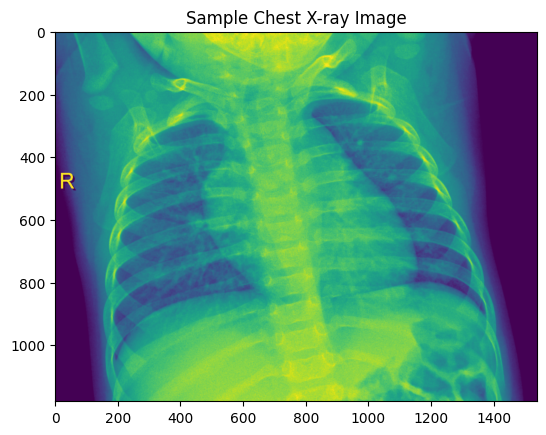

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load a sample image from the 'NORMAL' directory
sample_image_path = os.path.join(train_path, 'NORMAL', 'IM-0662-0001.jpeg')  # Update with the correct image name
img = mpimg.imread(sample_image_path)

# Display the image
plt.imshow(img)
plt.title("Sample Chest X-ray Image")
plt.show()


In [ ]:
print(train_generator.class_indices)


{'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Paths to the 'train', 'val', and 'test' directories
train_path = os.path.join(chest_xray_path, 'train')
val_path = os.path.join(chest_xray_path, 'val')
test_path = os.path.join(chest_xray_path, 'test')

# Load the dataset using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # For binary classification, 'categorical' is still fine
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN model for binary classification (2 classes)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes: NORMAL and PNEUMONIA
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.7447 - loss: 0.6868 - val_accuracy: 0.8750 - val_loss: 0.3623
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9061 - loss: 0.2258 - val_accuracy: 0.6250 - val_loss: 1.0015
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9091 - loss: 0.2073 - val_accuracy: 0.8125 - val_loss: 0.6121
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9261 - loss: 0.1865 - val_accuracy: 0.5625 - val_loss: 0.6540
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.9356 - loss: 0.1657 - val_accuracy: 0.8125 - val_loss: 0.4051
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9300 - loss: 0.1818 - val_accuracy: 0.7500 - val_loss: 0.5707
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.9403 - loss: 0.1461 - val_accuracy: 

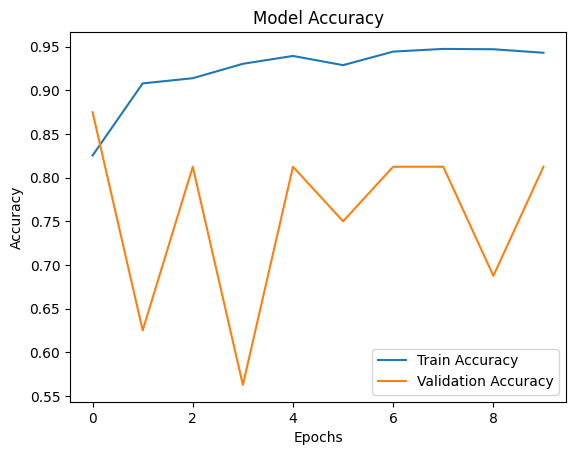

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 370ms/step - accuracy: 0.9383 - loss: 0.2360
Test accuracy: 0.9210526347160339, Test loss: 0.27810436487197876
